# MODELES DE MACHINE LEARNING DE CLASSIFICATION DES TRAMES RESEAU

## IMPORTATION DES LIBRAIRIES ET DU DATASET

In [5]:
# cd "C:\Users\donfa\OneDrive\Desktop\PROJET RESEAU"

C:\Users\donfa\OneDrive\Desktop\PROJET RESEAU


In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier # la librairie doit etre importee
# from lightgbm import LGBMClassifier # la librairie doit etre importee
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import numpy as np
data=pd.read_csv('FlowStatsfile.csv')
display(data)


,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.679206e+09,4,10.0.0.11010.0.0.601,10.0.0.11,0,10.0.0.6,0,1,0,0,...,20,100,0,4,392,0.800000,1.428571e-07,7.840000e+01,0.000014,0
1,1.679206e+09,4,10.0.0.6010.0.0.1101,10.0.0.6,0,10.0.0.11,0,1,0,8,...,20,100,0,4,392,0.800000,1.250000e-07,7.840000e+01,0.000012,0
2,1.679206e+09,2,10.0.0.1505010.0.0.6585906,10.0.0.1,5050,10.0.0.6,58590,6,-1,-1,...,20,100,0,123106,8125380,24621.200000,2.159754e-03,1.625076e+06,0.142551,0
3,1.679206e+09,2,10.0.0.11505010.0.0.6585901,10.0.0.11,5050,10.0.0.6,58590,1,0,0,...,20,100,0,4,392,0.800000,1.739130e-07,7.840000e+01,0.000017,0
4,1.679206e+09,2,10.0.0.65859010.0.0.150506,10.0.0.6,58590,10.0.0.1,5050,6,0,0,...,20,100,0,557949,32038437970,111589.800000,8.999177e-03,6.407688e+09,516.749000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898438,1.679208e+09,1,94.7.138.1612154710.0.0.1806,94.7.138.161,21547,10.0.0.1,80,6,-1,-1,...,20,100,0,0,0,0.000000,0.000000e+00,0.000000e+00,0.000000,1
898439,1.679208e+09,3,10.0.0.9010.0.0.901,10.0.0.9,0,10.0.0.9,0,1,0,8,...,20,100,0,3964622,642268764,495577.750000,2.202568e-01,8.028360e+07,35.681598,1
898440,1.679208e+09,2,10.0.0.9010.0.0.901,10.0.0.9,0,10.0.0.9,0,1,0,8,...,20,100,0,3965485,642408570,495685.625000,4.236629e-03,8.030107e+07,0.686334,1
898441,1.679208e+09,2,10.0.0.9010.0.0.901,10.0.0.9,0,10.0.0.9,0,1,0,8,...,20,100,0,7917400,1282618800,439855.555556,8.449733e-03,7.125660e+07,1.368857,1


## EXPLORATION DES DONNEES

In [7]:
print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())


Index(['timestamp', 'datapath_id', 'flow_id', 'ip_src', 'tp_src', 'ip_dst',
       'tp_dst', 'ip_proto', 'icmp_code', 'icmp_type', 'flow_duration_sec',
       'flow_duration_nsec', 'idle_timeout', 'hard_timeout', 'flags',
       'packet_count', 'byte_count', 'packet_count_per_second',
       'packet_count_per_nsecond', 'byte_count_per_second',
       'byte_count_per_nsecond', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898443 entries, 0 to 898442
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 898443 non-null  float64
 1   datapath_id               898443 non-null  int64  
 2   flow_id                   898443 non-null  object 
 3   ip_src                    898443 non-null  object 
 4   tp_src                    898443 non-null  int64  
 5   ip_dst                    898443 non-null  object 
 6   tp_dst                   

In [8]:
num=data.select_dtypes(include='number').columns.values
print(data['label'].value_counts())
x=data[['timestamp','datapath_id','tp_src','tp_dst','ip_proto','icmp_code'
 ,'icmp_type','flow_duration_sec','flow_duration_nsec','idle_timeout'
 ,'hard_timeout','flags','packet_count','byte_count'
 ,'packet_count_per_second','packet_count_per_nsecond'
 ,'byte_count_per_second','byte_count_per_nsecond']]
y=data['label']
smote=SMOTE()
x_sampled,y_sampled=smote.fit_resample(x,y)
print(x_sampled)
print('-----')
print(y_sampled)

'''for i in x_sampled.columns.values:
    sn.boxplot(data[i])
    plt.show()'''



label
1    892181
0      6262
Name: count, dtype: int64
            timestamp  datapath_id  tp_src  tp_dst  ip_proto  icmp_code  \
0        1.679206e+09            4       0       0         1          0   
1        1.679206e+09            4       0       0         1          0   
2        1.679206e+09            2    5050   58590         6         -1   
3        1.679206e+09            2    5050   58590         1          0   
4        1.679206e+09            2   58590    5050         6          0   
...               ...          ...     ...     ...       ...        ...   
1784357  1.679207e+09            3      41   18327         3          0   
1784358  1.679207e+09            3      80   35106         6         -1   
1784359  1.679207e+09            2   32928    2661         6          0   
1784360  1.679208e+09            3   33107   14536         6          0   
1784361  1.679207e+09            1   49489    1470         9          0   

         icmp_type  flow_duration_sec  flow

'for i in x_sampled.columns.values:\n    sn.boxplot(data[i])\n    plt.show()'

In [9]:
plt.figure(figsize=(17,6))
corr = data.corr(method='kendall')
my_m=np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

'''for i in data.select_dtypes(include='number').columns.values:
    for j in data.select_dtypes(include='number').columns.values:
        plt.plot(data[i],marker='o',label=f"{i}",color='red')
        plt.plot(data[j],marker='x',label=f"{j}",color="blue")
        plt.title(f"ITS {i} vs {j}")
        plt.legend()
        plt.show()'''



ValueError: could not convert string to float: '10.0.0.11010.0.0.601'

<Figure size 1700x600 with 0 Axes>

In [10]:
data['z-scores']=(data.timestamp-data.timestamp.mean())/(data.timestamp.std())
df=data[(data['z-scores']<3)&(data['z-scores']>-3)]
q1=df.timestamp.quantile(0.28)
q3=df.timestamp.quantile(0.72)
iqr=q3-q1
u=q3+1.5*iqr
l=q1-1.5*iqr
df=df[(df.timestamp > l )&(df.timestamp < u)]


In [11]:

df['z-scores']=(df.flow_duration_sec-df.flow_duration_sec.mean())/(df.flow_duration_sec.std())
df=df[(df['z-scores']<3)&(df['z-scores']>-3)]
q_1=df.flow_duration_sec.quantile(0.25)
q_3=df.flow_duration_sec.quantile(0.75)
iq_r=q_3-q_1
upp=q_3+1.5*iq_r
low=q_1-1.5*iq_r
df=df[(df.flow_duration_sec > low )&(df.flow_duration_sec < upp)]

print(data.select_dtypes(include='number').columns.values)
'''for i in x_sampled.columns.values:
    sn.boxplot(df[i])
    plt.show()'''



['timestamp' 'datapath_id' 'tp_src' 'tp_dst' 'ip_proto' 'icmp_code'
 'icmp_type' 'flow_duration_sec' 'flow_duration_nsec' 'idle_timeout'
 'hard_timeout' 'flags' 'packet_count' 'byte_count'
 'packet_count_per_second' 'packet_count_per_nsecond'
 'byte_count_per_second' 'byte_count_per_nsecond' 'label' 'z-scores']


'for i in x_sampled.columns.values:\n    sn.boxplot(df[i])\n    plt.show()'

In [12]:
colones=['timestamp','datapath_id','tp_src','tp_dst','ip_proto','icmp_code'
 ,'icmp_type','flow_duration_sec','flow_duration_nsec','idle_timeout'
 ,'hard_timeout','flags','packet_count','byte_count'
 ,'packet_count_per_second','packet_count_per_nsecond'
 ,'byte_count_per_second','byte_count_per_nsecond']

x=df[['timestamp','datapath_id','tp_src','tp_dst','ip_proto','icmp_code'
 ,'icmp_type','flow_duration_sec','flow_duration_nsec','idle_timeout'
 ,'hard_timeout','flags','packet_count','byte_count'
 ,'packet_count_per_second','packet_count_per_nsecond'
 ,'byte_count_per_second','byte_count_per_nsecond']]
y=df[['label']]

'''x=data[['timestamp','datapath_id','tp_src','tp_dst','ip_proto','icmp_code'
 ,'hard_timeout','flags','packet_count','byte_count'
 ,'packet_count_per_second','packet_count_per_nsecond'
 ,'byte_count_per_second','byte_count_per_nsecond']]
y=data[['label']]'''

x_train,x_test,y_train,y_test=train_test_split(x,y)


## TESTS DE DIFFERENTS ALGORITHMES ET MESURES DE SCORES

#### REGRESSION LOGISTIQUE

In [13]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('The logistic regression: ',lr.score(x_sampled,y_sampled))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression:  0.5132394659827995


#### CLASSIFICATEUR XGBOOST

In [ ]:
# xgb=XGBClassifier()
# xgb.fit(x_train,y_train)
# print("the Xgb : ",xgb.score(x_sampled,y_sampled))
# 


#### CLASSIFICATEUR LMBG

In [ ]:
# lgb=LGBMClassifier()
# lgb.fit(x_train,y_train)
# print('The LGB',lgb.score(x_sampled,y_sampled))



#### ARBRE DE DESCISION

In [20]:
import  joblib

tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
print('Dtree ',tree.score(x_sampled,y_sampled))
# Exportation du modèle
joblib.dump(tree, 'decision_tree_model.pkl')
print("Modèle exporté sous le nom 'decision_tree_model.pkl'")


Dtree  1.0
Modèle exporté sous le nom 'decision_tree_model.pkl'


#### RANDOM FOREST

In [15]:
rforest=RandomForestClassifier()
rforest.fit(x_train,y_train)
print('The random forest: ',rforest.score(x_sampled,y_sampled))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The random forest:  1.0


#### ADABOOST CLASSIFICATEUR

In [16]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print('the adb ',adb.score(x_sampled,y_sampled))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


the adb  1.0


#### GRADIENT BOOSTING 

In [17]:
grb=GradientBoostingClassifier()
grb.fit(x_train,y_train)
print('Gradient boosting ',grb.score(x_sampled,y_sampled))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient boosting  1.0


#### CLASSIFICATEUR BAGGING

In [18]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
print('Bagging',bag.score(x_sampled,y_sampled))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging 1.0


In [22]:
import joblib
import pandas as pd

def predict_label(data):
    """
    Charge le modèle de classification et prédit les labels pour les données fournies.
    
    Args:
        data (pd.DataFrame): Un DataFrame contenant les colonnes suivantes :
            ['timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto', 
             'icmp_code', 'icmp_type', 'flow_duration_sec', 'flow_duration_nsec',
             'idle_timeout', 'hard_timeout', 'flags', 'packet_count', 
             'byte_count', 'packet_count_per_second', 'packet_count_per_nsecond',
             'byte_count_per_second', 'byte_count_per_nsecond']
    
    Returns:
        pd.Series: Les prédictions du modèle (0 pour légitime, 1 pour attaque).
    """
    # Charger le modèle exporté
    model = joblib.load('decision_tree_model.pkl')
    
    # Assurez-vous que les colonnes nécessaires sont présentes
    required_columns = [
        'timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto',
        'icmp_code', 'icmp_type', 'flow_duration_sec', 'flow_duration_nsec',
        'idle_timeout', 'hard_timeout', 'flags', 'packet_count', 
        'byte_count', 'packet_count_per_second', 'packet_count_per_nsecond',
        'byte_count_per_second', 'byte_count_per_nsecond'
    ]
    
    if not all(col in data.columns for col in required_columns):
        raise ValueError("Les colonnes nécessaires ne sont pas présentes dans les données d'entrée.")
    
    # Filtrer les colonnes nécessaires pour les prédictions
    data_filtered = data[required_columns]
    
    # Faire des prédictions
    predictions = model.predict(data_filtered)
    return pd.Series(predictions, index=data.index, name='Predictions')


In [36]:
# Exemple de données
sample_data = pd.DataFrame({
    'timestamp': [123456789, 987654321],
    'datapath_id': [1, 2],
    'tp_src': [80, 8080],
    'tp_dst': [443, 53],
    'ip_proto': [6, 17],
    'icmp_code': [0, 0],
    'icmp_type': [8, 0],
    'flow_duration_sec': [5, 10],
    'flow_duration_nsec': [200, 400],
    'idle_timeout': [30, 60],
    'hard_timeout': [60, 120],
    'flags': [2, 18],
    'packet_count': [50, 100],
    'byte_count': [2048, 4096],
    'packet_count_per_second': [10, 20],
    'packet_count_per_nsecond': [1000, 2000],
    'byte_count_per_second': [500, 800],
    'byte_count_per_nsecond': [5000, 10000]
})

# Faire des prédictions
predictions = predict_label(sample_data)
print(predictions)


0    0
1    0
Name: Predictions, dtype: int64


In [24]:
import joblib

def predict_frame(frame):
    """
    Prédit le type d'une trame (légitime ou attaque) à partir de ses caractéristiques.
    
    Args:
        frame (dict): Un dictionnaire contenant les caractéristiques suivantes :
            {
                'timestamp': float,
                'datapath_id': int,
                'tp_src': int,
                'tp_dst': int,
                'ip_proto': int,
                'icmp_code': int,
                'icmp_type': int,
                'flow_duration_sec': float,
                'flow_duration_nsec': float,
                'idle_timeout': int,
                'hard_timeout': int,
                'flags': int,
                'packet_count': int,
                'byte_count': int,
                'packet_count_per_second': float,
                'packet_count_per_nsecond': float,
                'byte_count_per_second': float,
                'byte_count_per_nsecond': float
            }
    
    Returns:
        int: 0 si la trame est légitime, 1 si elle correspond à une attaque.
    """
    # Charger le modèle exporté
    model = joblib.load('decision_tree_model.pkl')
    
    # Vérifier que toutes les caractéristiques nécessaires sont présentes
    required_keys = [
        'timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto',
        'icmp_code', 'icmp_type', 'flow_duration_sec', 'flow_duration_nsec',
        'idle_timeout', 'hard_timeout', 'flags', 'packet_count', 
        'byte_count', 'packet_count_per_second', 'packet_count_per_nsecond',
        'byte_count_per_second', 'byte_count_per_nsecond'
    ]
    
    if not all(key in frame for key in required_keys):
        raise ValueError("Les caractéristiques suivantes manquent dans la trame : " +
                         ", ".join([key for key in required_keys if key not in frame]))
    
    # Organiser les caractéristiques dans le même ordre que lors de l'entraînement
    features = [
        frame['timestamp'], frame['datapath_id'], frame['tp_src'], frame['tp_dst'],
        frame['ip_proto'], frame['icmp_code'], frame['icmp_type'], 
        frame['flow_duration_sec'], frame['flow_duration_nsec'], 
        frame['idle_timeout'], frame['hard_timeout'], frame['flags'], 
        frame['packet_count'], frame['byte_count'], 
        frame['packet_count_per_second'], frame['packet_count_per_nsecond'], 
        frame['byte_count_per_second'], frame['byte_count_per_nsecond']
    ]
    
    # Prédire le type de la trame
    
    predictions = model.predict([features])[0]
    print(predictions)
    prediction=predictions[0]
    return prediction


In [25]:
# Exemple d'une trame à analyser
frame = {
    'timestamp': 123456789.0,
    'datapath_id': 1,
    'tp_src': 80,
    'tp_dst': 443,
    'ip_proto': 6,
    'icmp_code': 0,
    'icmp_type': 0,
    'flow_duration_sec': 5.0,
    'flow_duration_nsec': 200.0,
    'idle_timeout': 30,
    'hard_timeout': 60,
    'flags': 2,
    'packet_count': 50,
    'byte_count': 2048,
    'packet_count_per_second': 10.0,
    'packet_count_per_nsecond': 1000.0,
    'byte_count_per_second': 500.0,
    'byte_count_per_nsecond': 5000.0
}

# Prédire le type de la trame
result = predict_frame(frame)
if result == 0:
    print("Trame légitime")
else:
    print("Trame correspondant à une attaque")


0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


IndexError: invalid index to scalar variable.

In [40]:
import pandas as pd
import joblib

def predict_frame(frame):
    """
    Prédit le type d'une trame (légitime ou attaque) à partir de ses caractéristiques.
    
    Args:
        frame (dict): Un dictionnaire contenant les caractéristiques nécessaires.

    Returns:
        int: 0 si la trame est légitime, 1 si elle correspond à une attaque.
    """
    # Charger le modèle exporté
    model = joblib.load('decision_tree_model.pkl')
    
    # Vérifier que toutes les caractéristiques nécessaires sont présentes
    required_keys = [
        'timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto',
        'icmp_code', 'icmp_type', 'flow_duration_sec', 'flow_duration_nsec',
        'idle_timeout', 'hard_timeout', 'flags', 'packet_count', 
        'byte_count', 'packet_count_per_second', 'packet_count_per_nsecond',
        'byte_count_per_second', 'byte_count_per_nsecond'
    ]
    
    if not all(key in frame for key in required_keys):
        raise ValueError("Les caractéristiques suivantes manquent dans la trame : " +
                         ", ".join([key for key in required_keys if key not in frame]))
    
    # Convertir le dictionnaire en DataFrame avec une ligne
    frame_df = pd.DataFrame([frame])
    
    # Prédire le type de la trame
    predictions = model.predict(frame_df)
    print(predictions)
    prediction=predictions[0]
    return prediction


In [69]:
# Exemple d'une trame à analyser
frame = {
    'timestamp': 9336945550,
    'datapath_id': 1,
    'tp_src': 80,
    'tp_dst': 443,
    'ip_proto': 6,
    'icmp_code': 0,
    'icmp_type': 8,
    'flow_duration_sec': 50,
    'flow_duration_nsec': 20,
    'idle_timeout': 30,
    'hard_timeout': 60,
    'flags': 2,
    'packet_count': 50,
    'byte_count': 2048,
    'packet_count_per_second': 10,
    'packet_count_per_nsecond': 1,
    'byte_count_per_second': 500,
    'byte_count_per_nsecond': 50
}

# Prédire le type de la trame
result = predict_frame(frame)
if result == 0:
    print("Trame légitime")
else:
    print("Trame correspondant à une attaque")


[1]
Trame correspondant à une attaque


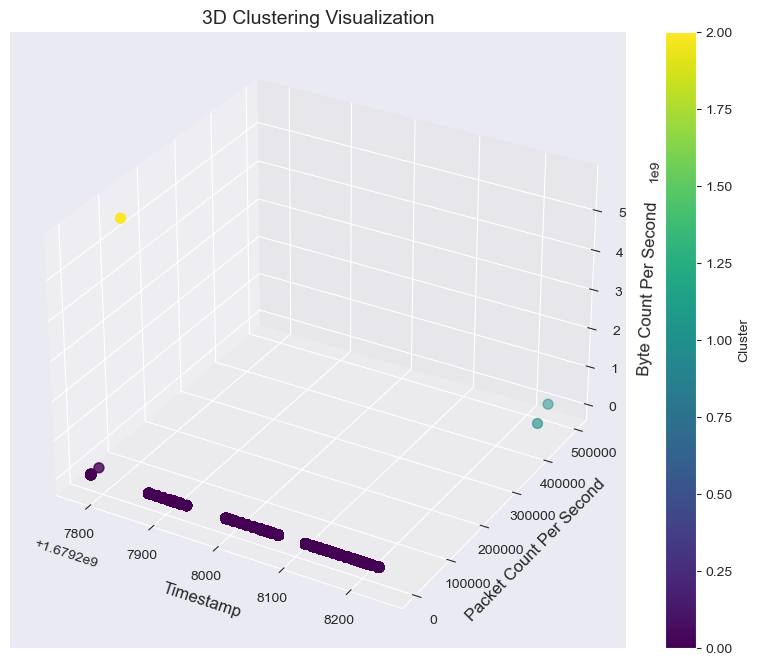

In [71]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulation of the dataset structure
# Assuming 'df' already exists with the required structure
columns = ['timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto', 'icmp_code',
           'icmp_type', 'flow_duration_sec', 'flow_duration_nsec', 'idle_timeout',
           'hard_timeout', 'flags', 'packet_count', 'byte_count',
           'packet_count_per_second', 'packet_count_per_nsecond',
           'byte_count_per_second', 'byte_count_per_nsecond', 'label']

# Mock data for demonstration purposes
np.random.seed(42)
n_samples = 200
# df = pd.DataFrame({
#     'timestamp': np.random.uniform(1, 1000, n_samples),
#     'datapath_id': np.random.randint(1, 5, n_samples),
#     'tp_src': np.random.randint(1, 65535, n_samples),
#     'tp_dst': np.random.randint(1, 65535, n_samples),
#     'ip_proto': np.random.randint(1, 256, n_samples),
#     'icmp_code': np.random.randint(0, 10, n_samples),
#     'icmp_type': np.random.randint(0, 10, n_samples),
#     'flow_duration_sec': np.random.uniform(0, 100, n_samples),
#     'flow_duration_nsec': np.random.uniform(0, 100, n_samples),
#     'idle_timeout': np.random.randint(1, 60, n_samples),
#     'hard_timeout': np.random.randint(1, 120, n_samples),
#     'flags': np.random.randint(0, 4, n_samples),
#     'packet_count': np.random.randint(1, 1000, n_samples),
#     'byte_count': np.random.randint(1, 100000, n_samples),
#     'packet_count_per_second': np.random.uniform(1, 500, n_samples),
#     'packet_count_per_nsecond': np.random.uniform(1, 1000, n_samples),
#     'byte_count_per_second': np.random.uniform(1, 1000, n_samples),
#     'byte_count_per_nsecond': np.random.uniform(1, 10000, n_samples),
#     'label': np.random.choice([0, 1], n_samples)
# })

# Extract features and labels
x = df[['timestamp', 'datapath_id', 'tp_src', 'tp_dst', 'ip_proto', 'icmp_code',
        'icmp_type', 'flow_duration_sec', 'flow_duration_nsec', 'idle_timeout',
        'hard_timeout', 'flags', 'packet_count', 'byte_count',
        'packet_count_per_second', 'packet_count_per_nsecond',
        'byte_count_per_second', 'byte_count_per_nsecond']]
y = df[['label']]

# Select relevant features for clustering
features_for_clustering = ['timestamp', 'packet_count_per_second', 'byte_count_per_second']
X_selected = x[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(X_selected['timestamp'], 
                     X_selected['packet_count_per_second'], 
                     X_selected['byte_count_per_second'], 
                     c=clusters, cmap='viridis', s=50)

# Labels and legend
ax.set_title('3D Clustering Visualization', fontsize=14)
ax.set_xlabel('Timestamp', fontsize=12)
ax.set_ylabel('Packet Count Per Second', fontsize=12)
ax.set_zlabel('Byte Count Per Second', fontsize=12)
plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()
